<h2>COVID-19 Data Analysis</h2>

<h4>About the Dataset:</h4>

On March 10, 2023, the Johns Hopkins Coronavirus Resource Center ceased its collecting and reporting of global COVID-19 data. For updated cases, deaths, and vaccine data please visit the following sources:

 - Global: World Health Organization (WHO): https://www.who.int/
 - U.S.: U.S. Centers for Disease Control and Prevention (CDC): https://www.cdc.gov/coronavirus/2019-ncov/index.html

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).

<b>Acknowledgements:</b> We are grateful to the following organizations for supporting our Center’s COVID-19 mapping and modeling efforts: Financial Support: Johns Hopkins University, National Science Foundation (NSF), Bloomberg Philanthropies, Stavros Niarchos Foundation; Resource support: AWS, Slack, Github; Technical support: Johns Hopkins Applied Physics Lab (APL), Esri Living Atlas team.

<b>Terms of Use:</b>

1. This data set is licensed under the Creative Commons Attribution 4.0 International (CC BY 4.0) by the Johns Hopkins University on behalf of its Center for Systems Science in Engineering. Copyright Johns Hopkins University 2020.

2. Attribute the data as the "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University" or "JHU CSSE COVID-19 Data" for short, and the url: https://github.com/CSSEGISandData/COVID-19.

3. For publications that use the data, please cite the following publication: "Dong E, Du H, Gardner L. An interactive web-based dashboard to track COVID-19 in real time. Lancet Inf Dis. 20(5):533-534. doi: 10.1016/S1473-3099(20)30120-1".

In [22]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats

In [23]:
# read datasets from url
url_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

# Load the datasets
confirmed_df = pd.read_csv(url_confirmed)
deaths_df = pd.read_csv(url_deaths)
recovered_df = pd.read_csv(url_recovered)

# dimensions of datasets
print(confirmed_df.shape)
print(deaths_df.shape)
print(recovered_df.shape)

(289, 1147)
(289, 1147)
(274, 1147)


In [24]:
# Display the first few rows of each dataset
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [25]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933


In [26]:
recovered_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Drop irrelevant columns (Province/State)
confirmed_df = confirmed_df.drop(columns=['Province/State', 'Lat', 'Long'])
deaths_df = deaths_df.drop(columns=['Province/State', 'Lat', 'Long'])
recovered_df = recovered_df.drop(columns=['Province/State', 'Lat', 'Long'])

In [28]:
# Group by country and sum the data
confirmed_df = confirmed_df.groupby('Country/Region').sum()
deaths_df = deaths_df.groupby('Country/Region').sum()
recovered_df = recovered_df.groupby('Country/Region').sum()

In [29]:
# Transpose the dataframes
confirmed_df = confirmed_df.transpose()
deaths_df = deaths_df.transpose()
recovered_df = recovered_df.transpose()

In [30]:
# Convert index to datetime
confirmed_df.index = pd.to_datetime(confirmed_df.index)
deaths_df.index = pd.to_datetime(deaths_df.index)
recovered_df.index = pd.to_datetime(recovered_df.index)

In [31]:
# Display the cleaned data
confirmed_df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [32]:
deaths_df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
recovered_df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>Exploratory Data Analysis (EDA)</h3>

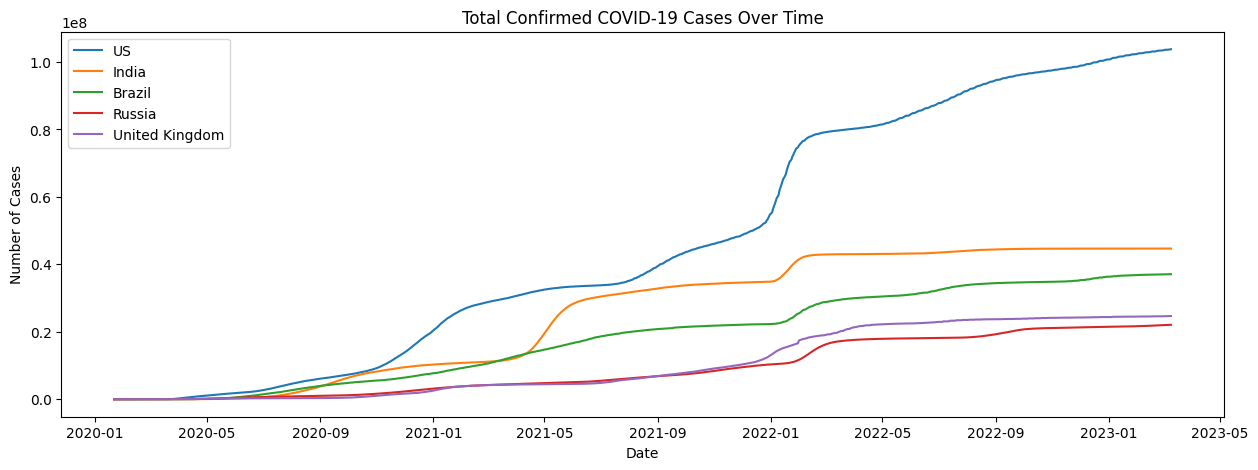

In [34]:
# Plot total confirmed cases over time for a few countries
plt.figure(figsize=(15, 5))
countries = ['US', 'India', 'Brazil', 'Russia', 'United Kingdom']

for country in countries:
    plt.plot(confirmed_df.index, confirmed_df[country], label=country)

plt.title('Total Confirmed COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

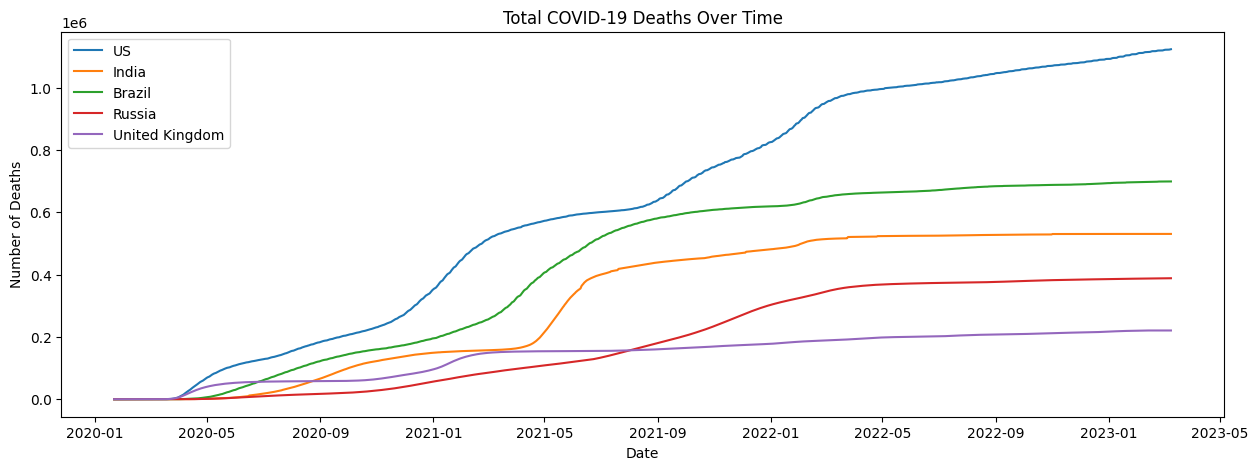

In [35]:
# Plot total deaths over time for a few countries
plt.figure(figsize=(15, 5))
for country in countries:
    plt.plot(deaths_df.index, deaths_df[country], label=country)

plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()

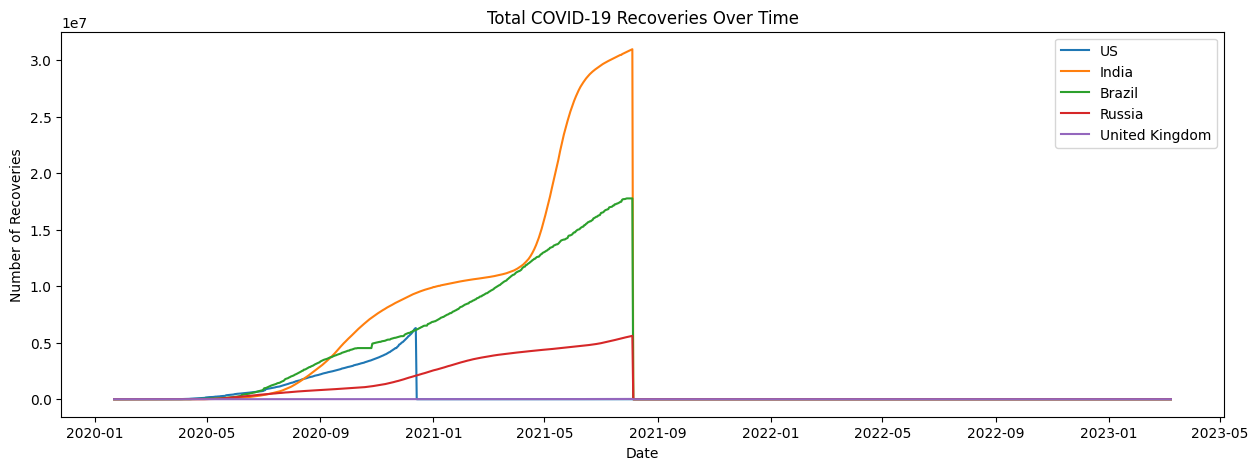

In [36]:
# Plot total recoveries over time for a few countries
plt.figure(figsize=(15, 5))
for country in countries:
    plt.plot(recovered_df.index, recovered_df[country], label=country)

plt.title('Total COVID-19 Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Recoveries')
plt.legend()
plt.show()

<h4>Growth Rate Analysis:</h4>

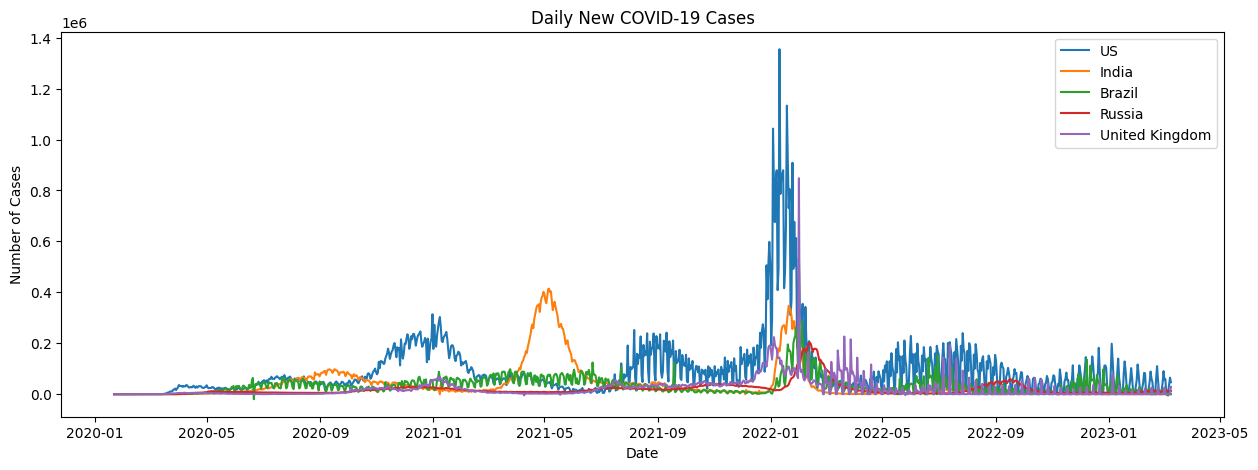

In [37]:
# Calculate daily new cases and growth rates
new_cases = confirmed_df.diff().fillna(0)
new_deaths = deaths_df.diff().fillna(0)
new_recoveries = recovered_df.diff().fillna(0)

growth_rate = new_cases.pct_change().fillna(0) * 100

# Plot daily new cases for a few countries
plt.figure(figsize=(15, 5))
for country in countries:
    plt.plot(new_cases.index, new_cases[country], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.show()

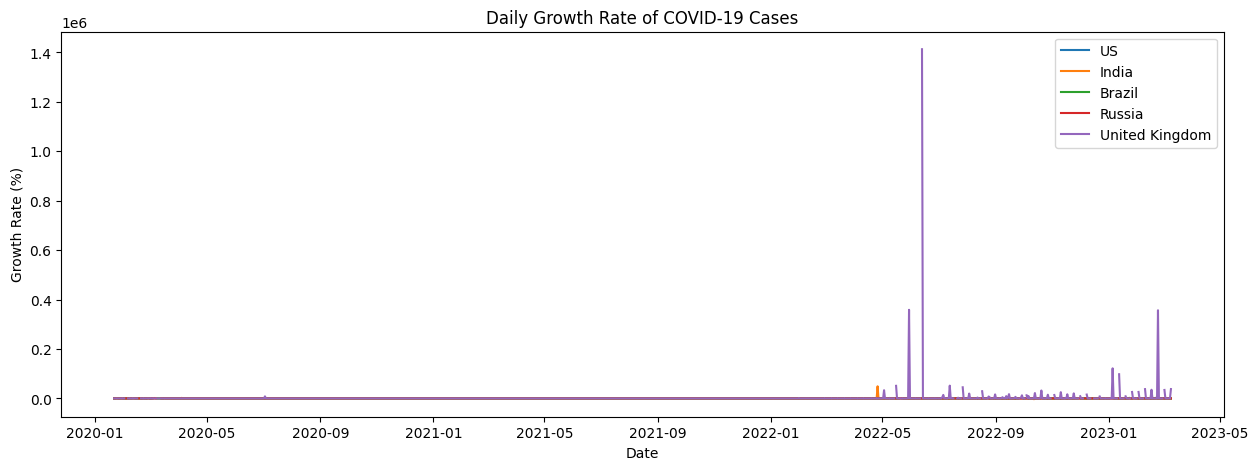

In [38]:
# Plot daily growth rate for a few countries
plt.figure(figsize=(15, 5))
for country in countries:
    plt.plot(growth_rate.index, growth_rate[country], label=country)

plt.title('Daily Growth Rate of COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.show()

<h4>Correlation and Regression Analysis:</h4>

In [40]:
# Correlation between cases and deaths
correlation = confirmed_df.corrwith(deaths_df)
print("Correlation between confirmed cases and deaths:")
print(correlation.sort_values(ascending=False).dropna())

Correlation between confirmed cases and deaths:
Country/Region
Korea, North        1.000000
Marshall Islands    0.999376
Samoa               0.998791
MS Zaandam          0.998549
Philippines         0.998288
                      ...   
Liechtenstein       0.836992
Netherlands         0.831071
Diamond Princess    0.820944
Switzerland         0.798338
China               0.752164
Length: 196, dtype: float64


In [41]:
# Linear Regression Example: Predict deaths based on confirmed cases for a single country
country = 'US'
X = confirmed_df[country].values.reshape(-1, 1)
y = deaths_df[country].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

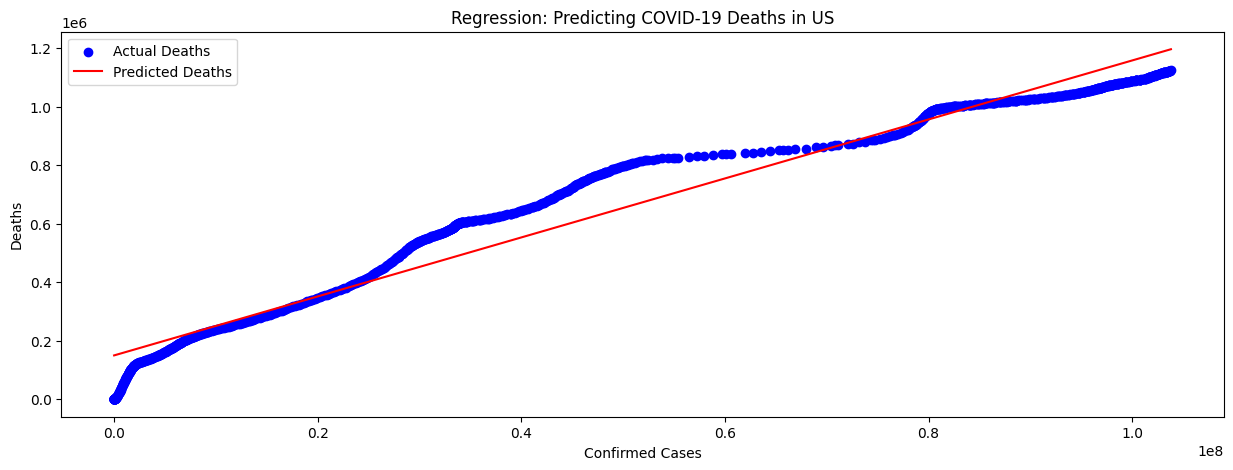

In [43]:
# Plot the regression line
plt.figure(figsize=(15, 5))
plt.scatter(X, y, color='blue', label='Actual Deaths')
plt.plot(X, y_pred, color='red', label='Predicted Deaths')
plt.title(f'Regression: Predicting COVID-19 Deaths in {country}')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.legend()
plt.show()

In [44]:
# Print the model's coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 149806.81897264312
Coefficient: 0.010083923241193013


<h4>Hypothesis Testing:</h4>

In [45]:
# Hypothesis Testing: Compare mean cases between US and Brazil
us_cases = confirmed_df['US']
brazil_cases = confirmed_df['Brazil']

t_stat, p_val = stats.ttest_ind(us_cases, brazil_cases, equal_var=False)

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

if p_val < 0.05:
    print("Reject the null hypothesis: The mean number of cases in the US and Brazil are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the mean number of cases.")

T-Statistic: 24.94773128960267
P-Value: 2.950221752925843e-114
Reject the null hypothesis: The mean number of cases in the US and Brazil are significantly different.


<h4>Time Series Analysis:</h4>

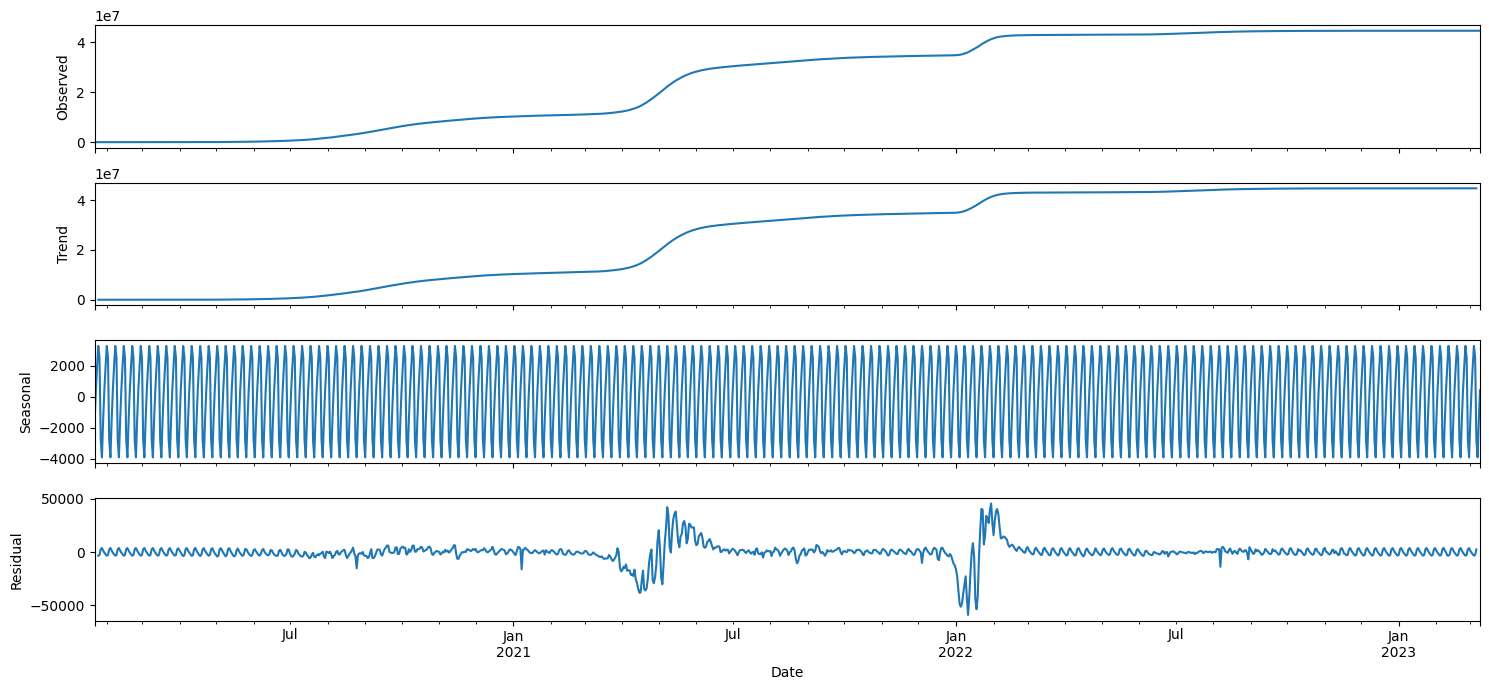

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series for a single country
country = 'India'
decomposed = seasonal_decompose(confirmed_df[country], model='additive')

# Set the figure size
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 7), sharex=True)

# Plot each component with the desired figure size
decomposed.observed.plot(ax=ax1, legend=False)
ax1.set_ylabel('Observed')

decomposed.trend.plot(ax=ax2, legend=False)
ax2.set_ylabel('Trend')

decomposed.seasonal.plot(ax=ax3, legend=False)
ax3.set_ylabel('Seasonal')

decomposed.resid.plot(ax=ax4, legend=False)
ax4.set_ylabel('Residual')

plt.xlabel('Date')
plt.tight_layout()
plt.show()

IndexError: index 1143 is out of bounds for axis 0 with size 1143

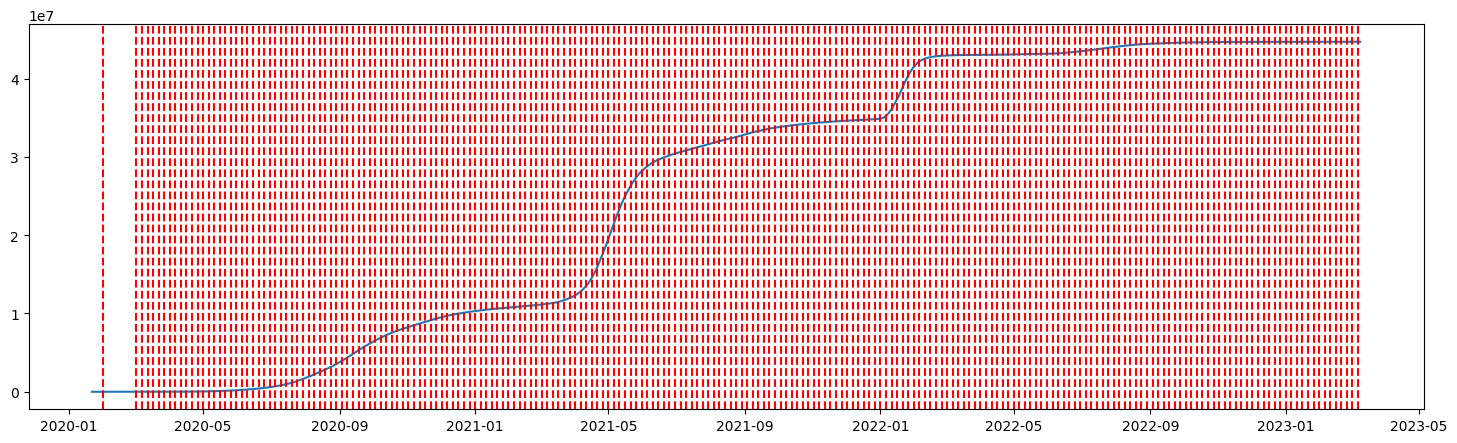

In [63]:
# Change Point Detection
import ruptures as rpt

# Example: Change point detection for India
country = 'India'
series = confirmed_df[country].values

# Model: "l1" for linear trend changes
algo = rpt.Pelt(model="l1").fit(series)
result = algo.predict(pen=10)

# Plotting
plt.figure(figsize=(18, 5))
plt.plot(confirmed_df.index, series, label='Confirmed Cases')
for cp in result:
    plt.axvline(confirmed_df.index[cp], color='red', linestyle='--')
plt.title(f'Change Point Detection in {country} COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14404\924499603.py:5: RuntimeWarning: divide by zero encountered in log
  doubling_time = np.log(2) / np.diff(np.log(cases))
d:\anaconda\envs\Deep_Learning\lib\site-packages\numpy\lib\function_base.py:1423: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14404\924499603.py:5: RuntimeWarning: divide by zero encountered in true_divide
  doubling_time = np.log(2) / np.diff(np.log(cases))


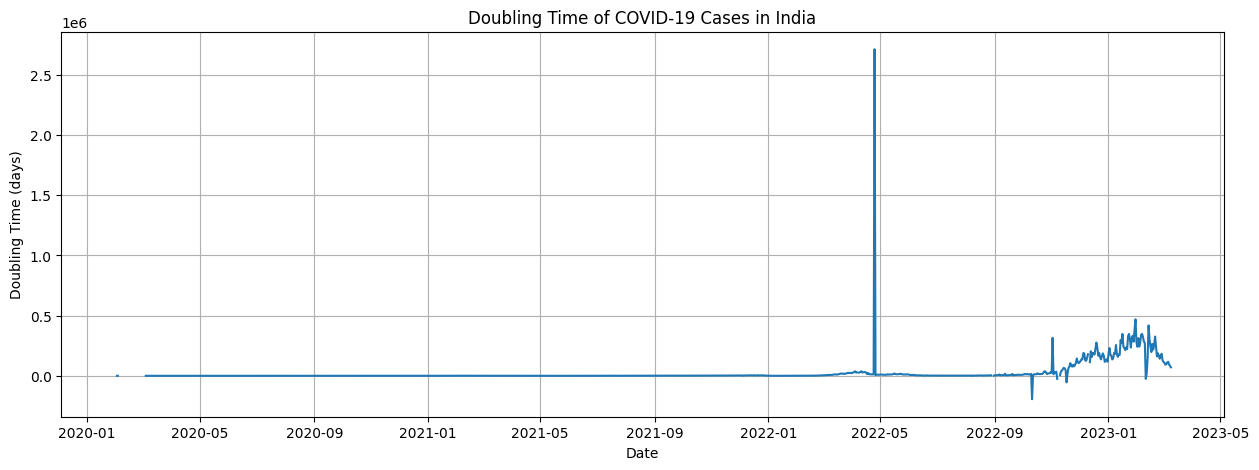

In [64]:
# Calculate the doubling time of COVID-19 cases.
# Example: Doubling time for India
country = 'India'
cases = confirmed_df[country].values
doubling_time = np.log(2) / np.diff(np.log(cases))

# Plotting doubling time
plt.figure(figsize=(15, 5))
plt.plot(confirmed_df.index[1:], doubling_time)
plt.title(f'Doubling Time of COVID-19 Cases in {country}')
plt.xlabel('Date')
plt.ylabel('Doubling Time (days)')
plt.grid(True)
plt.show()

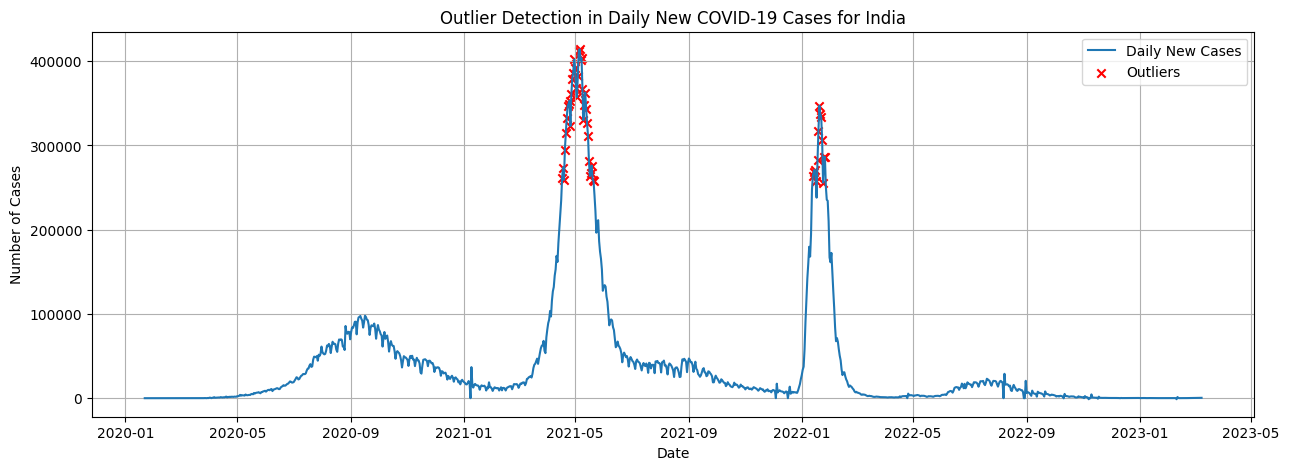

In [65]:
# Use Z-score to detect outliers in daily new cases.
from scipy.stats import zscore

# Calculate daily new cases
country = 'India'
new_cases = confirmed_df[country].diff().fillna(0)

# Calculate Z-scores for outlier detection
z_scores = zscore(new_cases)
outliers = new_cases[(z_scores > 3) | (z_scores < -3)]  # Z-score threshold of 3

# Plotting with outliers marked
plt.figure(figsize=(15, 5))
plt.plot(confirmed_df.index, new_cases, label='Daily New Cases')
plt.scatter(outliers.index, outliers, color='red', label='Outliers', marker='x')
plt.title(f'Outlier Detection in Daily New COVID-19 Cases for {country}')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()